In [1]:
import numpy as np
import pandas as pd      
import matplotlib.pyplot as plt

## Read data 1 , drop and add columns to data 1

In [2]:
data1 = pd.read_csv("dataset\data1.csv")
data1 = data1.dropna()
data1 = data1.drop('Country', axis = 1)
data1['thinness'] = data1[' thinness  1-19 years']+data1[' thinness 5-9 years']

## Create two new datasets from cateogorized as developing and developed countries

In [3]:
data1_developing = data1[data1['Status'] == 'Developing']
data1_developed = data1[data1['Status'] == 'Developed']

## Read data 2, drop NaN values in data 2

In [4]:
data2 = pd.read_csv("dataset\data2.csv")
data2 = data2.dropna()

## Create a list containing annual life expectancy from 1800 to 2016

In [5]:
annual_le = []
year = []
for i in range(1800,2017):
    annual_le.append(data2[str(i)].mean())
    year.append(i)

## Create a new dataset which contains global annual life expectancy

In [6]:
annual_le_s = pd.Series(annual_le, name = 'life_expectancy')
year_s = pd.Series(year, name = 'year')
data2_year = pd.concat([year_s,annual_le_s],axis=1)
data2_year = data2_year.set_index('year')

## Print line graph of Global Life Expectancy from 1800 to 2015

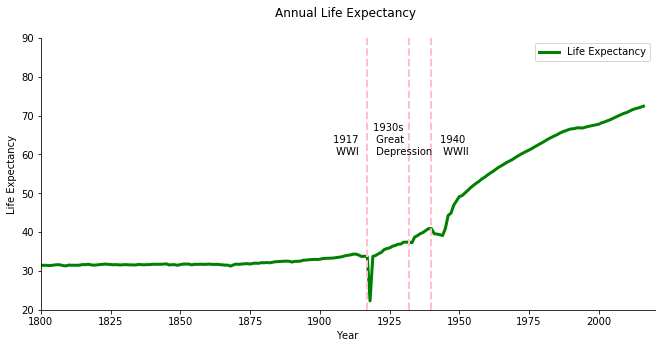

In [7]:
# Code for line graph 

# plot settings (size)
fig, ax = plt.subplots(figsize = (11,5))

# line graph settings(color, line width)
data2_year.life_expectancy.plot(ax = ax, color = 'green', linewidth = 3.0)

# labels
ax.set_xlabel("Year")
ax.set_title("Annual Life Expectancy \n ") # Lable the y axis (only once since its the same for both)
ax.set_ylabel("Life Expectancy")

# x and y limits
ax.set_xlim(1800,2020)
ax.set_ylim(20,90)

# create vertical line for drastic drop in 1917 (WWI)
ax.axvline(x=1917, color='pink', linestyle='--', linewidth=2)
message = "1917 \n WWI " 
ax.text(1915, 60, message, horizontalalignment='right')

# create vertical line for drop in 1930s (The Great Depression)
ax.axvline(x=1932, color='pink', linestyle='--', linewidth=2)
message = "1930s \n Great \n Depression" 
ax.text(1919, 60, message, horizontalalignment='left')

# create vertical line for drop in 1940 (WWII)
ax.axvline(x=1940, color='pink', linestyle='--', linewidth=2)
message = "1940 \n WWII" 
ax.text(1943, 60, message, horizontalalignment='left') 

# remove the right and top "spines"
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# create legend for line graph with frame
ax.legend(["Life Expectancy"],frameon=True)

plt.savefig("graphs\line_graph_1.png", bbox_inches="tight", dpi = 600)
plt.show()

## Print histogram on life expectancy from 2000 to 2015 

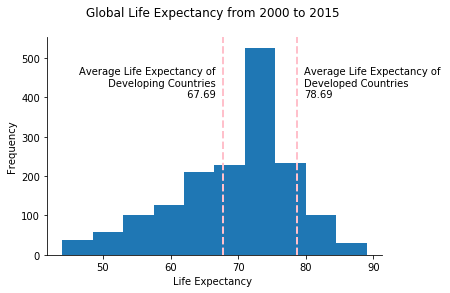

In [8]:
# Code for histogram on life expectancy from 2000 to 2015
fig, ax = plt.subplots()

# create histogram
data1['Life expectancy '].plot(kind='hist', ax=ax)

# x-label
ax.set_xlabel("Life Expectancy ")

# set title
ax.set_title("Global Life Expectancy from 2000 to 2015 \n")

# remove the right and top "spines"
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# calculate the avg life expectancy for developing countries and developed countries
# create a vertical line and label them

# for developing countries
avg_developing = data1_developing['Life expectancy '].mean() # This computes the average value.
ax.axvline(x=avg_developing, color='pink', linestyle='--', linewidth=2) 
message = "Average Life Expectancy of\n Developing Countries\n " + str(round(avg_developing,2))                                                  
ax.text(avg_developing -1, 400, message, horizontalalignment='right') 

# for developed countries
avg_developed = data1_developed['Life expectancy '].mean()
ax.axvline(x = avg_developed, color  = 'pink', linestyle = '--', linewidth  = 2)
message = "Average Life Expectancy of \nDeveloped Countries \n"+ str(round(avg_developed,2))
ax.text(avg_developed +1, 400, message, horizontalalignment='left') 

# save graph as a png file 
plt.savefig("graphs\hist.png", bbox_inches="tight", dpi = 600)
plt.show()

## Print scatter plot comparing expenditure factors to life expectancy

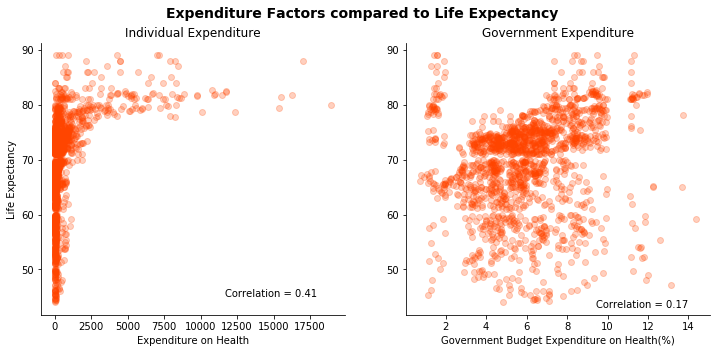

In [9]:
# Code for scatter plot comparing expenditure factors to life expectancy

# plot settings (plot size, number of columns and rows)
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (12,5))

# create a correlation matrix that contains the correlation between variables in data1
corr_mat = data1.corr()

# create suptitle 
fig.suptitle("Expenditure Factors compared to Life Expectancy \n ", fontsize = 14, fontweight = "bold") 

# initalize variable count to keep track which scatter graph is created
count = 0

# initalize name_list for what is the x-variable in the scatter plot using count
name_list = ['percentage expenditure','Total expenditure']

for var in ax: 
    # scatter plot settings (x,y axis, darkness of point, color)
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.25, c = 'orangered')
    
    # remove right and top "spines
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    # get the correlation for each scatter plot from correlation matrix
    cr = corr_mat['Life expectancy '][name_list[count]]
    message = "Correlation = " + str(round(cr,2))
                                      
    if count == 0:
        # title
        var.set_title("Individual Expenditure", fontsize = 12) 
        # print correlation message
        var.text(18000, 45, message, horizontalalignment='right')
        # x and y labels
        var.set_ylabel("Life Expectancy")
        var.set_xlabel("Expenditure on Health")
    else:
        # title
        var.set_title("Government Expenditure", fontsize = 12) 
        # print correlation message
        var.text(14,43,message, horizontalalignment = 'right')
        # x label
        var.set_xlabel("Government Budget Expenditure on Health(%)")
    count+=1
                                      
# save scatter plot as a png file
plt.savefig("graphs\scatter_plot_1.png", bbox_inches="tight", dpi = 600)
plt.show()

## Print scatter plot comparing immunization-related factors to life expectancy

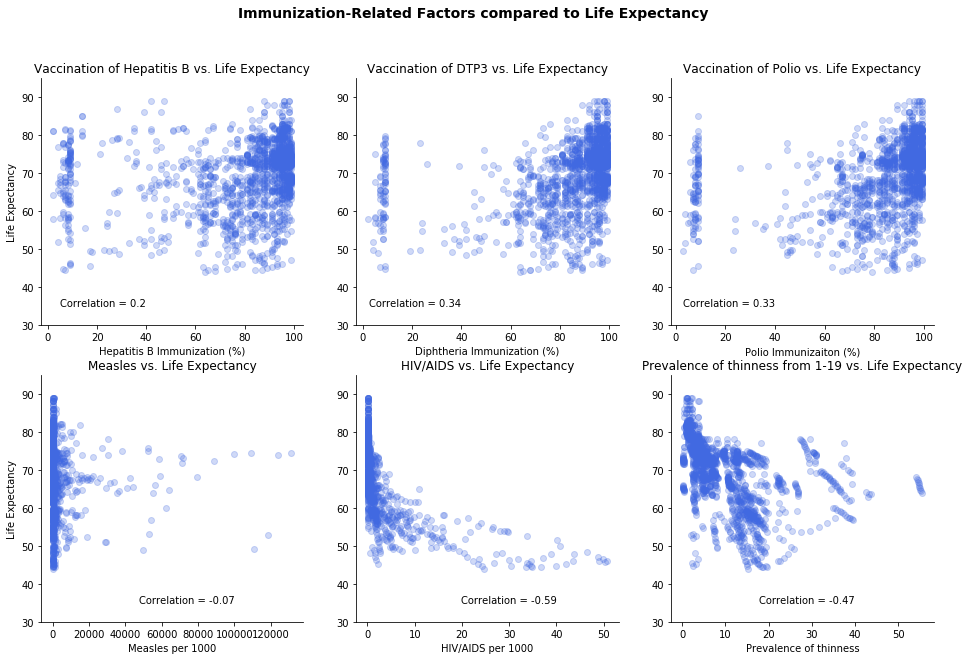

In [10]:
# Code for scatter plot comparing immunization factors to lif expectancy

# plot settings (# of rows and columns, size)
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, figsize = (16,10))

# "ravel" the scatter plots from 2 rows and 3 columns to 1 row and 8 columns
ax = ax.ravel()

# create suptitle
fig.suptitle("Immunization-Related Factors compared to Life Expectancy", fontsize = 14, fontweight = "bold") 

# initalize count to keep track of what scatter plot is created
count = 0

# initalize name_list for what is the x-variable in the scatter plot using count
name_list = ['Hepatitis B', 'Diphtheria ','Polio', 'Measles ', ' HIV/AIDS','thinness']

for var in ax: 
    # scatter plot settings (x & y axis, darkness and color of point)
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.25, c = 'royalblue')
    
    # remove right and top "spines0" 
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    # retrieve correlation for each scatter plot from correlation matrix
    cr = corr_mat['Life expectancy '][name_list[count]] 
    message = "Correlation = " + str(round(cr,2))
    
    # y-limit
    var.set_ylim(30,95)
    
    # create title, x & y-label, correlation message for each scatter plot
    if count == 0:
        var.set_title("Vaccination of Hepatitis B vs. Life Expectancy", fontsize = 12)
        var.text(40, 35, message, horizontalalignment='right')
        var.set_xlabel("Hepatitis B Immunization (%)")
        var.set_ylabel("Life Expectancy")
    elif count == 1:
        var.set_title("Vaccination of DTP3 vs. Life Expectancy", fontsize = 12)
        var.text(40, 35, message, horizontalalignment='right')
        var.set_xlabel("Diphtheria Immunization (%)")
    elif count == 2:
        var.set_title("Vaccination of Polio vs. Life Expectancy", fontsize = 12)
        var.text(40, 35, message, horizontalalignment='right')
        var.set_xlabel("Polio Immunizaiton (%)")
    elif count == 3:
        var.set_title("Measles vs. Life Expectancy", fontsize = 12)
        var.text(100000, 35, message, horizontalalignment='right')
        var.set_xlabel("Measles per 1000")
        var.set_ylabel("Life Expectancy")
    elif count == 4:
        var.set_title("HIV/AIDS vs. Life Expectancy", fontsize = 12)
        var.text(40, 35, message, horizontalalignment='right')
        var.set_xlabel("HIV/AIDS per 1000")
    else:
        var.set_title("Prevalence of thinness from 1-19 vs. Life Expectancy", fontsize = 12)
        var.text(40, 35, message, horizontalalignment='right')
        var.set_xlabel("Prevalence of thinness")
    count+=1

# save scatter plot as a png file
plt.savefig("graphs\scatter_plot_2.png", bbox_inches="tight", dpi = 600)
plt.show()

## Print scatter plot comparing lifestyle-related factors to life expectancy

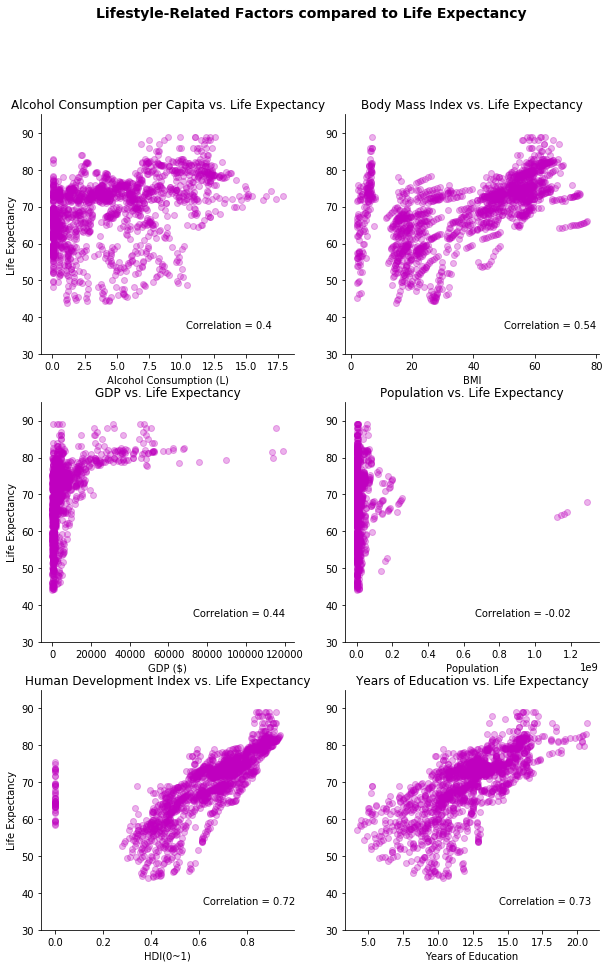

In [11]:
# Code for scatter plot comparing lifestyle-related factors to life expectancy

# plot settings (# of rows and columns, size)
fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex = False, figsize = (10,15))

# "ravel" the plot from 3 rows and 2 columns to 1 row and 6 coulumns
ax = ax.ravel()

# create suptitle
fig.suptitle("Lifestyle-Related Factors compared to Life Expectancy", fontsize = 14, fontweight = "bold") 

# initalize count to keep track of what scatter plot is created
count = 0

# initalize name_list for what is the x-variable in the scatter plot using count
name_list = [ 'Alcohol',' BMI ','GDP', 'Population','Income composition of resources', 'Schooling']

for var in ax: 
    # scatter plot settings (x & y-axis, darkness and color of point)
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.3, c = 'm')
    
    # remove right and top "spines"
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    # retrieve correlation for each scatter plot from correlation matrix
    cr = corr_mat['Life expectancy '][name_list[count]] 
    message = "Correlation = " + str(round(cr,2))
    
    # y-limit
    var.set_ylim(30,95)
    
    # create title, correlation message, x and y-label for each scatter plot
    if count == 0:
        var.set_title("Alcohol Consumption per Capita vs. Life Expectancy", fontsize = 12)
        var.text(17, 37, message, horizontalalignment='right')
        var.set_xlabel("Alcohol Consumption (L)")
        var.set_ylabel("Life Expectancy")
    elif count == 1:
        var.set_title("Body Mass Index vs. Life Expectancy", fontsize = 12)
        var.text(80, 37, message, horizontalalignment='right')
        var.set_xlabel("BMI")
    elif count == 2:
        var.set_title("GDP vs. Life Expectancy", fontsize = 12)
        var.text(120000, 37, message, horizontalalignment='right')
        var.set_xlabel("GDP ($)")
        var.set_ylabel("Life Expectancy")
    elif count == 3:
        var.set_title("Population vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Population")
        var.text(1200000000, 37, message, horizontalalignment='right')
    elif count == 4:
        var.set_title("Human Development Index vs. Life Expectancy", fontsize = 12)
        var.text(1, 37, message, horizontalalignment='right')
        var.set_xlabel("HDI(0~1)")
        var.set_ylabel("Life Expectancy")
    else:
        var.set_title("Years of Education vs. Life Expectancy", fontsize = 12)
        var.text(21, 37, message, horizontalalignment='right')
        var.set_xlabel("Years of Education")
        
    count+=1

# save scatter plot as a png file
plt.savefig("graphs\scatter_plot_3.png", bbox_inches="tight", dpi = 600)
plt.show()

## Print scatter plot comparing mortality-related factors to life expectancy

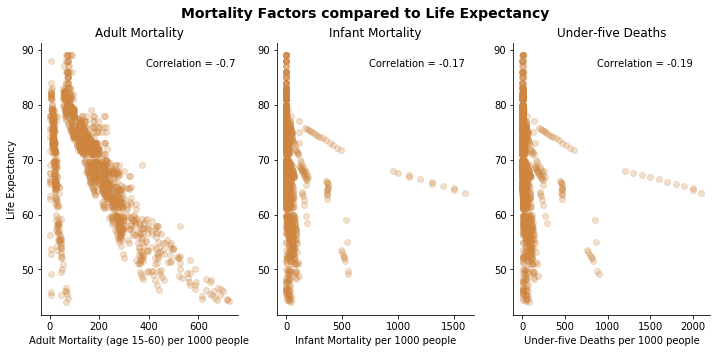

In [12]:
# Code for scatter plot comparing mortality-related factors to life expectancy 

# plot settings (# of rows and columns, size)
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize = (12,5))

# create sup title
fig.suptitle("Mortality Factors compared to Life Expectancy", fontsize = 14, fontweight = "bold") 

# initalize count to keep track of what scatter plot is created
count = 0

# initalize name_list for what is the x-variable in the scatter plot using count
name_list = ['Adult Mortality','infant deaths','under-five deaths ']

for var in ax: 
    # scatter plot settings (x & y-axis, darkness and color of point)
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.25, c = 'peru')
    
    # remove right and top "spines"
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    # retrieve correlation for each scatter plot from correlation matrix
    cr = corr_mat['Life expectancy '][name_list[count]] 
    message = "Correlation = " + str(round(cr,2))
   
    # create title, correlation message, and x & y-labels
    if count == 0:
        var.set_title("Adult Mortality")
        var.text(750, 87, message, horizontalalignment='right')
        var.set_xlabel('Adult Mortality (age 15-60) per 1000 people')
        var.set_ylabel("Life Expectancy")
    elif count == 1:
        var.set_title("Infant Mortality")
        var.text(1600, 87, message, horizontalalignment = 'right')
        var.set_xlabel('Infant Mortality per 1000 people')
    else:
        var.set_title("Under-five Deaths")
        var.text(2000, 87,message, horizontalalignment = 'right')
        var.set_xlabel('Under-five Deaths per 1000 people')
    count+=1

# save scatter plot as a png file
plt.savefig("graphs\scatter_plot_4.png", bbox_inches="tight", dpi = 600)
plt.show()

## Create a new dataset (data1_low) containing data that have low life expectancy ( < 65)

In [13]:
data1_low = data1[data1['Life expectancy '] < 65]

## Print scatter plot comparing expenditure factors to life expectancy for data1_low

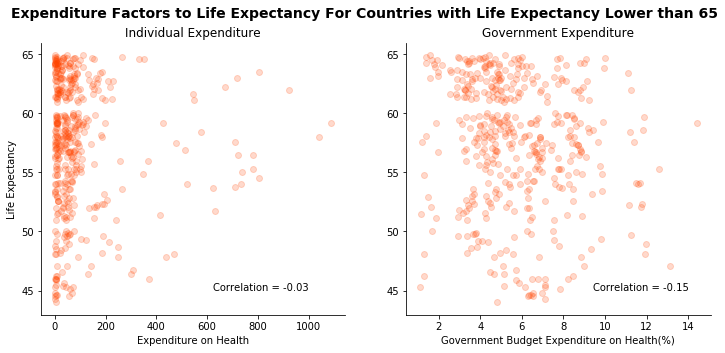

In [14]:
# Code for scatter plot comparing expenditure factors to life expectancy for data1_low
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (12,5))

# create correlation matrix for data1_low
corr_mat1 = data1_low.corr()

#labels
fig.suptitle("Expenditure Factors to Life Expectancy For Countries with Life Expectancy Lower than 65", fontsize = 14, fontweight = "bold") 

# initalize count to keep track of what scatter plot is created
count = 0

# initalize name_list for what is the x-variable in the scatter plot using count
name_list = ['percentage expenditure','Total expenditure']

for var in ax: 
    # scatter plot settings (x & y-axis, darkness and color of point)
    var.scatter(data1_low[name_list[count]], data1_low["Life expectancy "], alpha= 0.2, c = 'orangered')
    
    # remove right and top "spines"
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    # retreive correlation for each scatter plot from correlation matrix
    cr = corr_mat1['Life expectancy '][name_list[count]]
    message = "Correlation = " + str(round(cr,2))
    
    # create title, correlation message, and x & y labels
    if count == 0:
        var.set_title("Individual Expenditure", fontsize = 12)  
        var.text(1000, 45, message, horizontalalignment='right')
        var.set_xlabel("Expenditure on Health")
        var.set_ylabel("Life Expectancy")
    else:
        var.set_title("Government Expenditure", fontsize = 12)
        var.text(14,45,message, horizontalalignment = 'right')
        var.set_xlabel("Government Budget Expenditure on Health(%)")
    count+=1

# save scatter plot as a png file
plt.savefig("graphs\scatter_plot_5.png", bbox_inches="tight", dpi = 600)
plt.show()

## Print scatter plot comparing influential factors to life expectancy for developed and developing countries
### Influential factors : HIV/AIDS, BMI, HDI, Education ( correlation > 0.5 or  < -0.5)

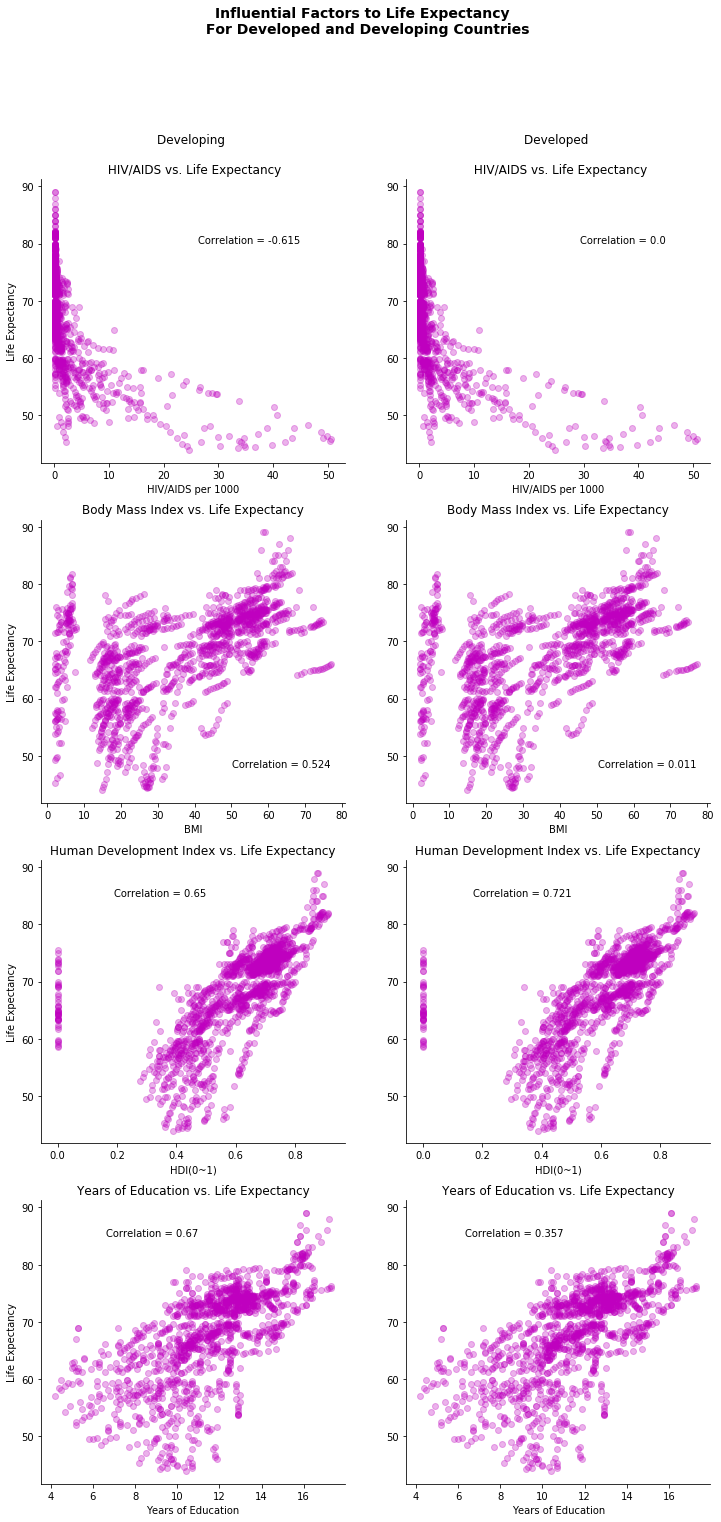

In [15]:
# Code for scatter plot comparing influential factors to developed and developing countries

# plot settings (# of rows and columns, size)
fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (12,24))

# "ravel" the plot from 3 rows and 2 columns to 1 row and 6 coulumns
ax = ax.ravel()

# create a correlation matrix between variables in data1_developing
corr_mat_ing = data1_developing.corr()

# create a correlation matrix between variables in data1_developed
corr_mat_ed = data1_developed.corr()

# create suptitle
fig.suptitle("Influential Factors to Life Expectancy \n For Developed and Developing Countries", fontsize = 14, fontweight = "bold") 

# initalize count to keep track of what scatter plot is created
count = 0

# initalize name_list for what is the x-variable in the scatter plot using count
name_list = [ ' HIV/AIDS', ' BMI ','Income composition of resources', 'Schooling']

# initalize country_list for which category is for each scatter plot
country_list = [data1_developing, data1_developed]

temp = country_list[count%2]

for var in ax: 
    # scatter plot settings (x & y-axis, darkness and color of point)
    var.scatter(temp[name_list[count//2]], temp["Life expectancy "], alpha= 0.3, c = 'm')
    
    # remove right and top "spines"
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    # retrieve correlation for each scatter plot from correlation matrix
    if count%2 == 0:
        cr = corr_mat_ing['Life expectancy '][name_list[count//2]]
    else:
        cr = corr_mat_ed['Life expectancy '][name_list[count//2]]
    message = "Correlation = " + str(round(cr,3))
    
    # create title, correlation message, x and y-label for each scatter plot
    if count == 0:
        var.set_title("Developing \n \n HIV/AIDS vs. Life Expectancy", fontsize = 12)
        var.text(45, 80, message, horizontalalignment='right')
        var.set_xlabel("HIV/AIDS per 1000")
        var.set_ylabel("Life Expectancy")
    elif count == 1:
        var.set_title("Developed \n \n HIV/AIDS vs. Life Expectancy", fontsize = 12)
        var.text(45, 80, message, horizontalalignment='right')
        var.set_xlabel("HIV/AIDS per 1000")
    elif count == 2:
        var.set_title("Body Mass Index vs. Life Expectancy", fontsize = 12)
        var.text(77, 48, message, horizontalalignment='right')
        var.set_xlabel("BMI")
        var.set_ylabel("Life Expectancy")
    elif count == 3:
        var.set_title("Body Mass Index vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("BMI")
        var.text(77, 48, message, horizontalalignment='right')
    elif count == 4:
        var.set_title("Human Development Index vs. Life Expectancy", fontsize = 12)
        var.text(0.5, 85, message, horizontalalignment='right')
        var.set_xlabel("HDI(0~1)")
        var.set_ylabel("Life Expectancy")
    elif count ==5:
        var.set_title("Human Development Index vs. Life Expectancy", fontsize = 12)
        var.text(0.5, 85, message, horizontalalignment='right')
        var.set_xlabel("HDI(0~1)")
    elif count == 6:
        var.set_title("Years of Education vs. Life Expectancy", fontsize = 12)
        var.text(11, 85, message, horizontalalignment='right')
        var.set_xlabel("Years of Education")
        var.set_ylabel("Life Expectancy")
    else:
        var.set_title("Years of Education vs. Life Expectancy", fontsize = 12)
        var.text(11, 85, message, horizontalalignment='right')
        var.set_xlabel("Years of Education")
        
    count+=1

# save scatter plot as a png file
plt.savefig("graphs\scatter_plot_6.png", bbox_inches="tight", dpi = 600)
plt.show()